In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [13]:
# Load processed dataset
df = pd.read_csv('../data/processed/hourly_features_data.csv', parse_dates=['timestamp'], index_col='timestamp')
df.head()

,Studer Output Frequency - L1,Studer Output Frequency - L2,Studer Output Frequency - L3,Grid Input Frequency - L1,Grid Input Frequency - L2,Grid Input Frequency - L3,Grid Input Voltage - L2,Grid Input Voltage - L3,Studer Grid Status - L1,Studer Grid Status - L2,...,Imported from Grid (Wh)_lag72,Imported from Grid (Wh)_roll_mean_3,Imported from Grid (Wh)_roll_std_3,Imported from Grid (Wh)_roll_mean_6,Imported from Grid (Wh)_roll_std_6,Imported from Grid (Wh)_roll_mean_24,Imported from Grid (Wh)_roll_std_24,weather_severity,weather_intensity,weather_impact
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-09-08 06:00:00,49.933333,49.933333,49.933333,49.933833,49.933333,49.932833,250.133333,247.350000,1.0,1.0,...,70.25,86.500000,10.213349,90.083333,7.897257,58.833333,41.866160,1,1.0,1.0
2023-09-08 08:00:00,50.033000,50.033500,50.033500,50.033500,50.033500,50.032000,249.366667,241.983333,1.0,1.0,...,73.00,43.166667,38.697814,68.291667,36.852889,56.718750,43.524126,1,1.0,1.0
2023-09-08 09:00:00,50.029000,50.029500,50.028500,50.028500,50.029500,50.027500,248.883333,246.233333,1.0,1.0,...,67.50,18.250000,31.609927,52.375000,42.881450,56.604167,43.675739,1,1.0,1.0
2023-09-08 10:00:00,50.040500,50.041000,50.040500,50.041000,50.040500,50.040500,252.850000,247.766667,1.0,1.0,...,73.25,0.000000,0.000000,37.125000,42.452547,56.604167,43.675739,1,1.0,1.0
2023-09-08 11:00:00,50.019000,50.019500,50.019000,50.019000,50.019500,50.018000,253.066667,247.833333,1.0,1.0,...,65.50,0.000000,0.000000,21.583333,34.029644,56.604167,43.675739,1,1.0,1.0


In [14]:
# Define target variables
targets = [
    'Energy Produced (Wh)',
    'Energy Consumed (Wh)',
    'net_export_import_grid'
]

In [15]:
# Forecast horizon (e.g., next 2 days if hourly)
forecast_horizon = 48

In [16]:
# Function to calculate MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / np.maximum(np.abs(y_true), 1e-8))) * 100

# Store results
results_summary = []


Forecasting: Energy Produced (Wh)


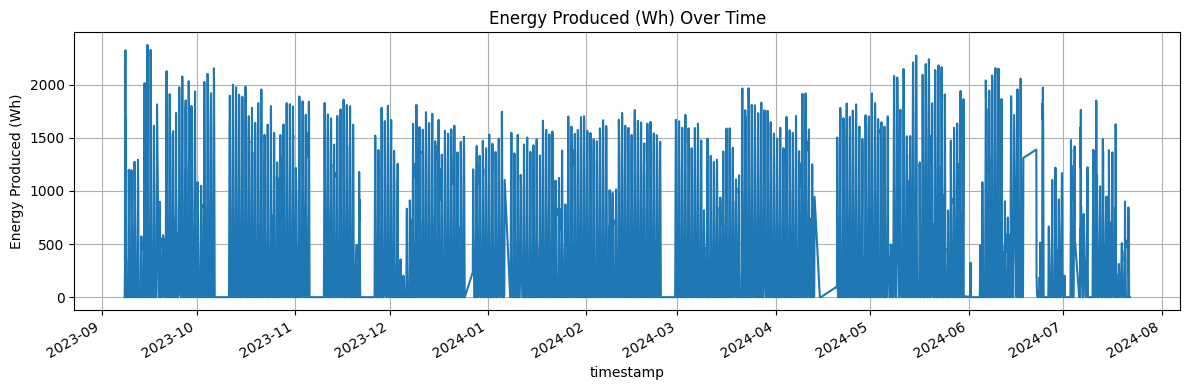

c:\Users\burha\.conda\envs\mrp\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\burha\.conda\envs\mrp\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


MAE: 228.81
RMSE: 331.00
MAPE: 525422623035.55%
R² Score: -0.692


c:\Users\burha\.conda\envs\mrp\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\burha\.conda\envs\mrp\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


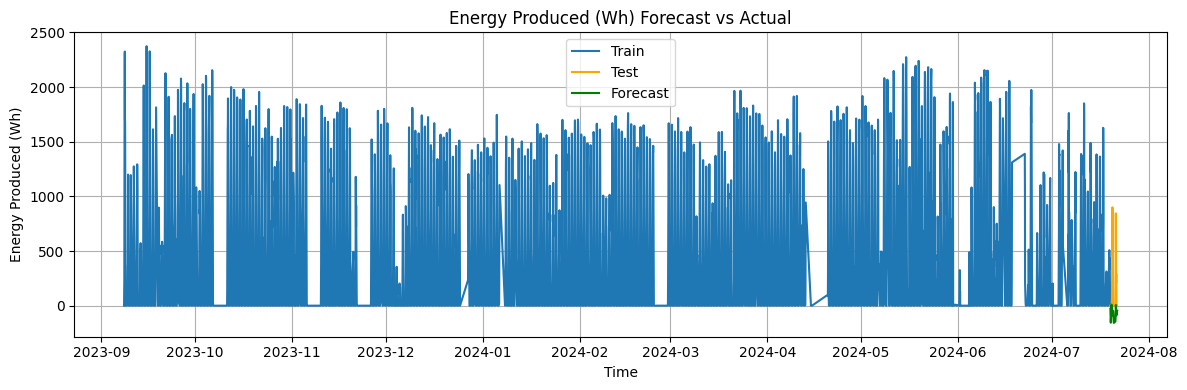


Forecasting: Energy Consumed (Wh)


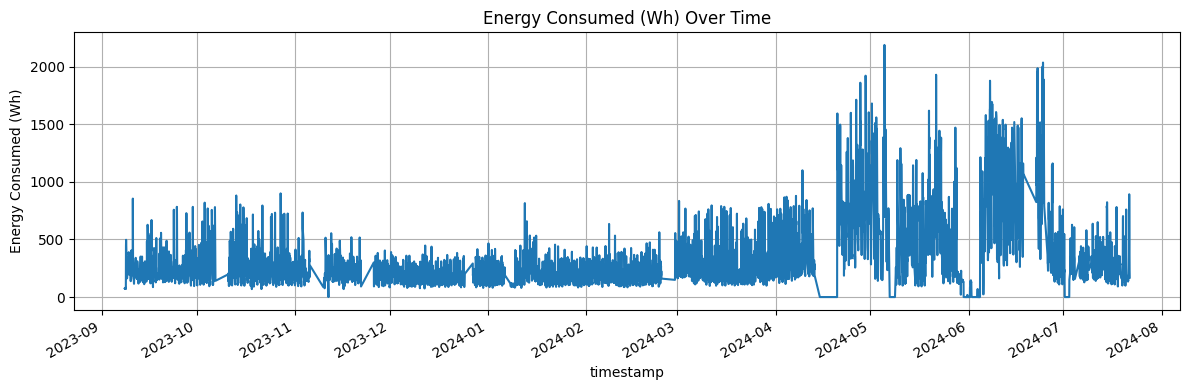

c:\Users\burha\.conda\envs\mrp\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\burha\.conda\envs\mrp\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


MAE: 138.46
RMSE: 208.47
MAPE: 42.44%
R² Score: -0.100


c:\Users\burha\.conda\envs\mrp\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\burha\.conda\envs\mrp\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


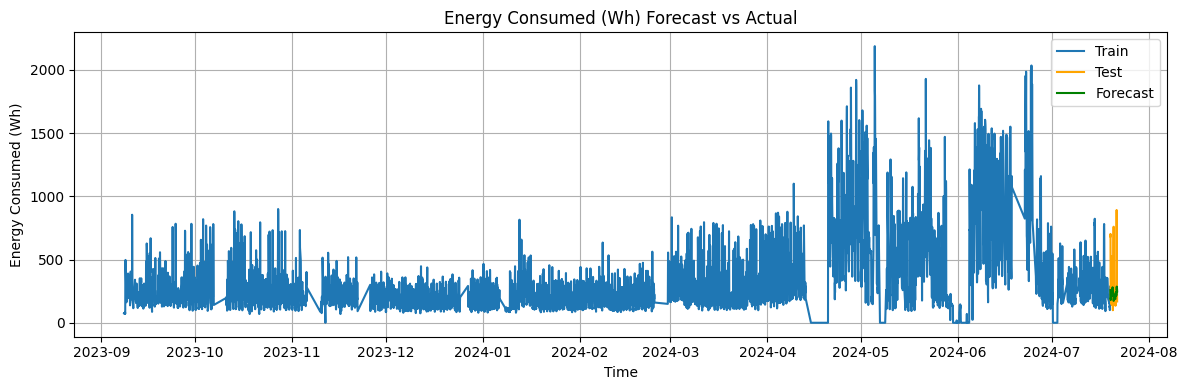


Forecasting: net_export_import_grid


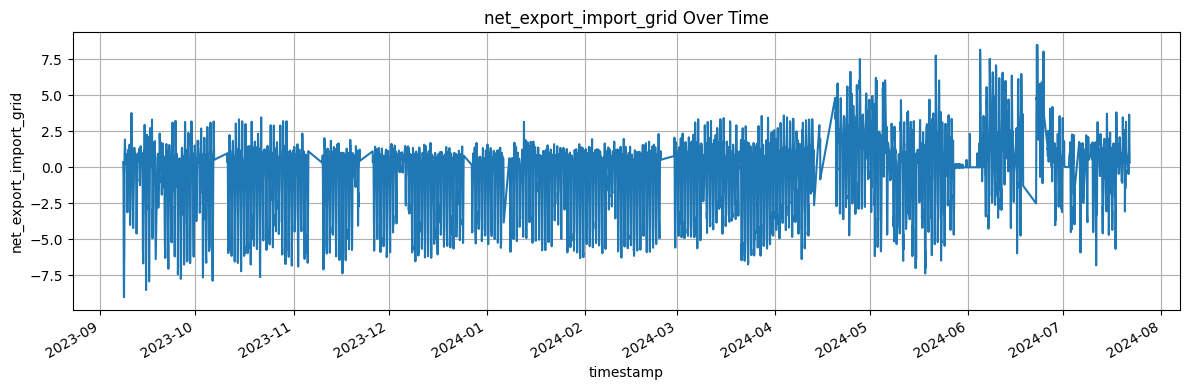

c:\Users\burha\.conda\envs\mrp\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\burha\.conda\envs\mrp\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


MAE: 1.46
RMSE: 1.70
MAPE: 10986.51%
R² Score: -0.762


c:\Users\burha\.conda\envs\mrp\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\burha\.conda\envs\mrp\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


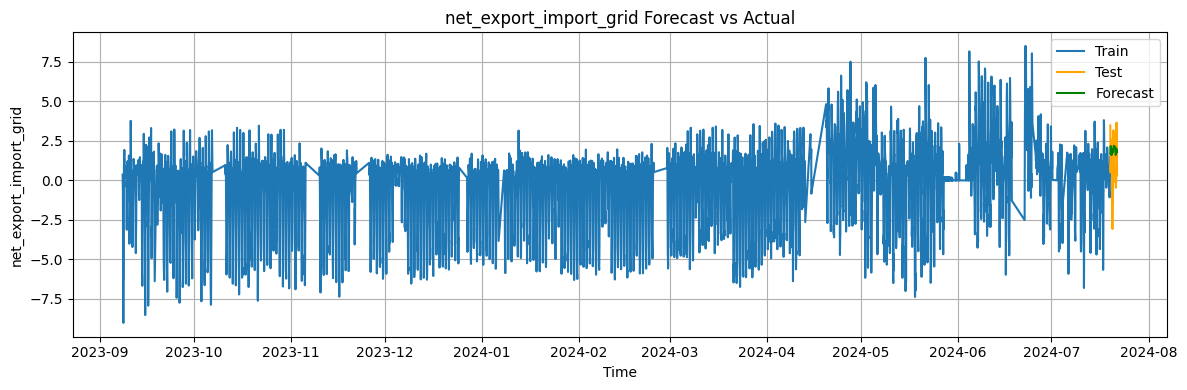

In [17]:
# Iterate through targets
for target in targets:
    print(f"\n{'='*30}\nForecasting: {target}\n{'='*30}")

    # Visualize target
    plt.figure(figsize=(12, 4))
    df[target].plot(title=f'{target} Over Time', ylabel=target)
    plt.grid()
    plt.tight_layout()
    plt.show()

    # Train/Test Split
    train = df[target][:-forecast_horizon]
    test = df[target][-forecast_horizon:]

    # SARIMA model
    model = SARIMAX(train,
                    order=(1, 1, 1),
                    seasonal_order=(1, 1, 1, 24),
                    enforce_stationarity=False,
                    enforce_invertibility=False)
    results = model.fit(disp=False)

    # Forecast
    forecast = results.forecast(steps=forecast_horizon)
    forecast.index = test.index

    # Evaluation Metrics
    mae = mean_absolute_error(test, forecast)
    rmse = np.sqrt(mean_squared_error(test, forecast))
    r2 = r2_score(test, forecast)
    mape_val = mape(test, forecast)

    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAPE: {mape_val:.2f}%")
    print(f"R² Score: {r2:.3f}")

    results_summary.append({
        "Target": target,
        "MAE": mae,
        "RMSE": rmse,
        "MAPE (%)": mape_val,
        "R2": r2
    })

    # Plot forecast
    plt.figure(figsize=(12, 4))
    plt.plot(train.index, train, label='Train')
    plt.plot(test.index, test, label='Test', color='orange')
    plt.plot(forecast.index, forecast, label='Forecast', color='green')
    plt.title(f'{target} Forecast vs Actual')
    plt.xlabel('Time')
    plt.ylabel(target)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()


In [18]:
# Display results table
results_df = pd.DataFrame(results_summary)
print("\n\n=== Evaluation Summary ===")
print(results_df.round(2))




=== Evaluation Summary ===
                   Target     MAE    RMSE      MAPE (%)    R2
0    Energy Produced (Wh)  228.81  331.00  5.254226e+11 -0.69
1    Energy Consumed (Wh)  138.46  208.47  4.244000e+01 -0.10
2  net_export_import_grid    1.46    1.70  1.098651e+04 -0.76
